In [1]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

## Review
- Conducted at https://pollev.com/jeremysanchez during class time

## New material

### Every variable has a distribution

In [5]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies.show(6)

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956


In [30]:
studio_distribution = top_movies.group('Studio')

In [31]:
studio_distribution.show(6)

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24


### Visualizing distributions

#### **Task:** Visualize the distribution of studios responsible for the highest grossing movies as of 2017.

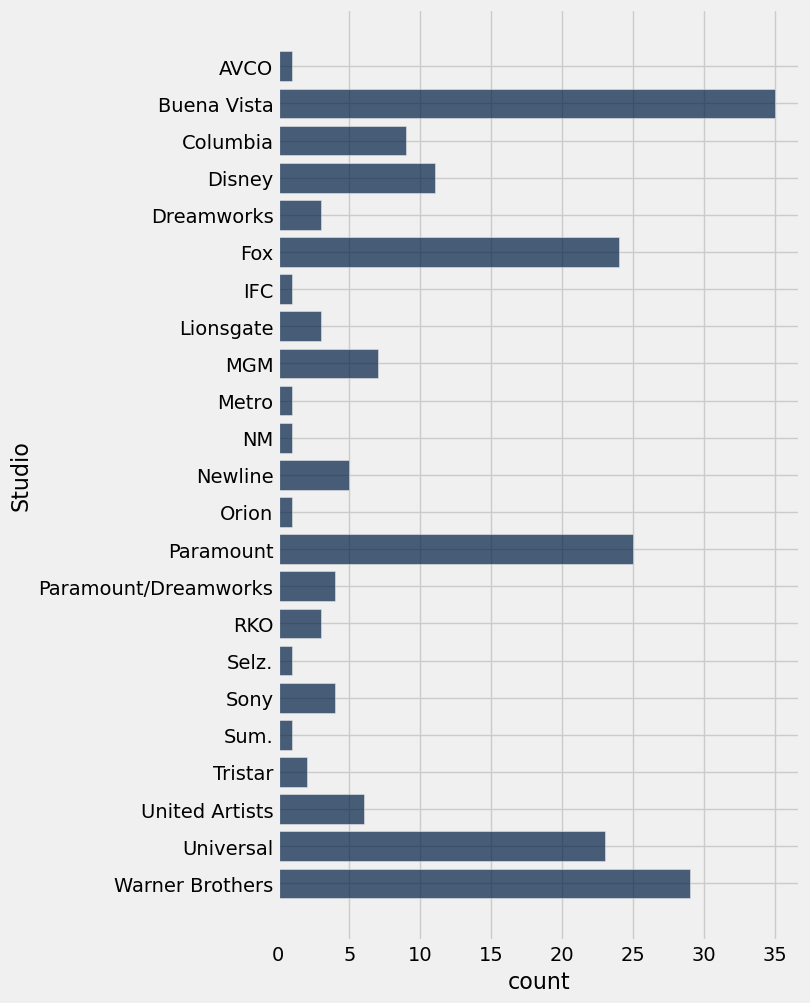

In [10]:
studio_distribution.barh('Studio')

Five studios are largely responsible for the highest grossing movies


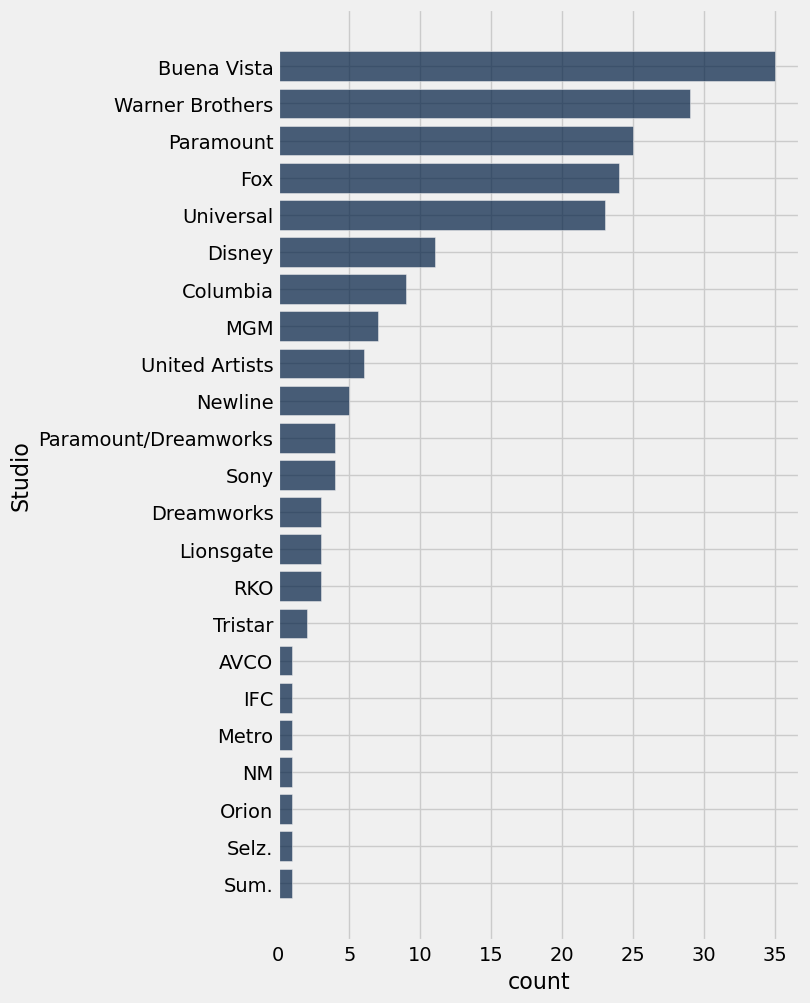

In [16]:
studio_distribution.sort('count', descending=True).barh('Studio')
print("Five studios are largely responsible for the highest grossing movies")

_____

### Use binning for numerical distributions

#### **Task**: Visualize the distribution of how long the highest grossing movies as of 2017 have been out (in years).

In [23]:
ages = 2022 - top_movies.column('Year')

In [24]:
top_movies = top_movies.with_column('Age', ages)

In [25]:
top_movies.select('Title', 'Age').show(6)

Title,Age
Gone with the Wind,83
Star Wars,45
The Sound of Music,57
E.T.: The Extra-Terrestrial,40
Titanic,25
The Ten Commandments,66


In [32]:
min(ages), max(ages)

(5, 101)

- If you want to make equally sized bins, `np.arange()` is a great tool to help you.

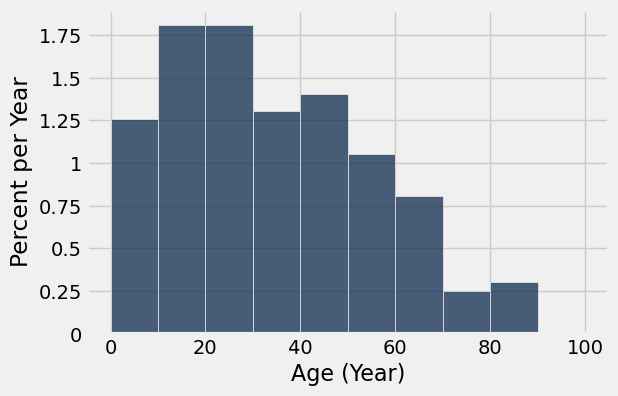

In [50]:
top_movies.hist('Age', bins = np.arange(0, 110, 10), unit = 'Year')

- Otherwise, you can pick your own bins. These are just bins that we picked out.


In [74]:
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 101)

In [76]:
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data

bin,Age count
0,0
5,25
10,16
15,40
25,42
40,56
65,21
101,0


**Note:** The last bin does not include any observations!! 
 - This is because $101$ is the right endpoint of the last bin. It is not the beginning of any bin.

### Introducing the histogram

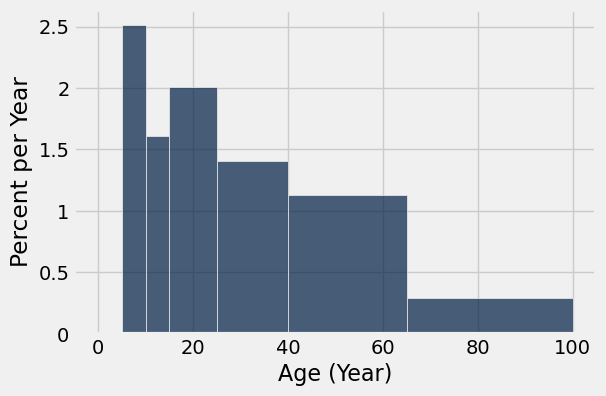

In [52]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')

#### **Discussion Question (1 min)**: Compare the bins $[25, 40)$ and $[40, 65)$. 

- Which one has more movies?
- Which one is more crowded?

____

#### **Task**: Find the height of the $[40,65)$ bin in the histogram above.

$$\text{height} = \frac{\text{percent}}{\text{width}}$$

Add a column containing what percent of movies are in each bin (the **area** of each bin)

In [89]:
binned_data = binned_data.with_column('Percent', 100*binned_data.column('Age count')/200)

In [59]:
binned_data.show(3)

bin,Age count,Percent
0,0,0
5,25,12.5
10,16,8


In [58]:
percent = binned_data.where('bin', 40).column('Percent').item(0)

In [60]:
width = 65-40
height = percent / width

In [61]:
height

1.12

#### **Task**: Find the heights of the (rest of the) bins.

$$\text{height} = \frac{\text{percent}}{\text{width}}$$

In [90]:
height_table = binned_data.take(np.arange(binned_data.num_rows - 1))
height_table

bin,Age count,Percent
0,0,0
5,25,12.5
10,16,8
15,40,20
25,42,21
40,56,28
65,21,10.5


In [91]:
bin_widths = np.diff(binned_data.column('bin'))

In [92]:
bin_widths

array([ 5,  5,  5, 10, 15, 25, 36])

In [93]:
height_table = height_table.with_column('Width', bin_widths)
height_table

bin,Age count,Percent,Width
0,0,0,5
5,25,12.5,5
10,16,8,5
15,40,20,10
25,42,21,15
40,56,28,25
65,21,10.5,36


In [95]:
height_table = height_table.with_column('Height',
                                        height_table.column('Percent')/height_table.column('Width'))

In [96]:
height_table

bin,Age count,Percent,Width,Height
0,0,0,5,0
5,25,12.5,5,2.5
10,16,8,5,1.6
15,40,20,10,2
25,42,21,15,1.4
40,56,28,25,1.12
65,21,10.5,36,0.291667


To check our work one last time:

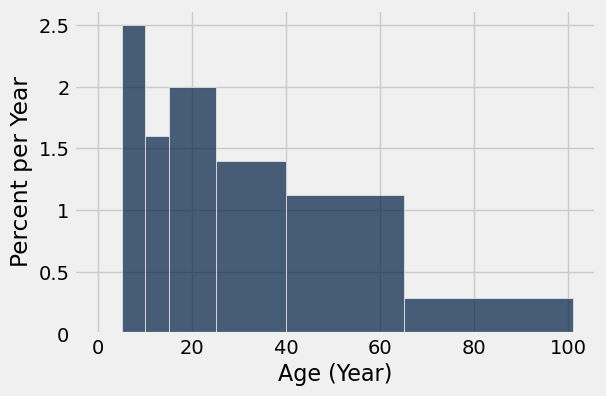

In [97]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')